# Stepper Motor Model for Dynamic Simulation

## Importing libraries

In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import sys

## RL Circuit: Rectangular Pulses

### Circuit Parameters and funtion

In [2]:
R = 5.3 # In Ohms
L = 0.0125 # In Henrys
f = 10 # In Hertzs
T = 1/f # In seconds
v_high = 24 # In volts

def pulse(h_pulse):
    global t_pulse
        
    if 0<=t_pulse<T/2:
        v = v_high
        t_pulse += h_pulse
    elif T/2<=t_pulse<T:
        v = -v_high
        t_pulse += h_pulse
    else:
        v = 24
        t_pulse = 0
        
    return v    
    
def f(t,i,mode='Euler'):
    h_pulse = h
    if mode == 'RK4':
        h_pulse = h/4
    
    v = pulse(h_pulse)        
    i_present = i
    i_next = (1/L)*(v - R*i_present)
    return i_next

### Euler Method

In [3]:
# Initial Conditions
t_pulse = 0
i1 = 0

# Simulation Parameters
total_time1 = 2 #in seconds
steps1 = 1
t, h = 0., 0.001

# Plotting Parameters
steps_to_save1 = int(total_time1/(h*steps1))
vt1 = np.zeros(steps_to_save1+1)
vy1 = np.zeros(steps_to_save1+1)
limit_t1 = 0.1

idx=0
vt1[idx] = t
vy1[idx] = i1
idx += 1
while t<total_time1:
    for step in range(steps1):
        k1 = f(t, i1)
        i1 += h*k1
        t += h
        
    print("At", t, "=> Current is", i1)
    vt1[idx] = t
    vy1[idx] = i1
    idx += 1

At 0.001 => Current is 1.92
At 0.002 => Current is 3.02592
At 0.003 => Current is 3.66292992
At 0.004 => Current is 4.02984763392
At 0.005 => Current is 4.241192237137921
At 0.006 => Current is 4.362926728591442
At 0.007 => Current is 4.43304579566867
At 0.008 => Current is 4.4734343783051544
At 0.009000000000000001 => Current is 4.49669820190377
At 0.010000000000000002 => Current is 4.510098164296571
At 0.011000000000000003 => Current is 4.517816542634825
At 0.012000000000000004 => Current is 4.522262328557659
At 0.013000000000000005 => Current is 4.524823101249211
At 0.014000000000000005 => Current is 4.526298106319546
At 0.015000000000000006 => Current is 4.527147709240059
At 0.016000000000000007 => Current is 4.527637080522274
At 0.017000000000000008 => Current is 4.5279189583808295
At 0.01800000000000001 => Current is 4.528081320027358
At 0.01900000000000001 => Current is 4.528174840335758
At 0.02000000000000001 => Current is 4.528228708033397
At 0.02100000000000001 => Current is 

At 0.4940000000000004 => Current is -4.528301884427271
At 0.4950000000000004 => Current is -4.528301885430108
At 0.4960000000000004 => Current is -4.528301886007742
At 0.4970000000000004 => Current is -4.52830188634046
At 0.4980000000000004 => Current is -4.5283018865321045
At 0.4990000000000004 => Current is -4.528301886642492
At 0.5000000000000003 => Current is -4.528301886706076
At 0.5010000000000003 => Current is -4.5283018867427
At 0.5020000000000003 => Current is -4.528301886763795
At 0.5030000000000003 => Current is -4.528301886775946
At 0.5040000000000003 => Current is -4.528301886782945
At 0.5050000000000003 => Current is -0.6883018867869759
At 0.5060000000000003 => Current is 1.523538113210702
At 0.5070000000000003 => Current is 2.797557953209364
At 0.5080000000000003 => Current is 3.531393381048594
At 0.5090000000000003 => Current is 3.95408258748399
At 0.5100000000000003 => Current is 4.197551570390778
At 0.5110000000000003 => Current is 4.337789704545088
At 0.5120000000000

At 0.9940000000000008 => Current is -4.528301849488721
At 0.9950000000000008 => Current is -4.528301865305504
At 0.9960000000000008 => Current is -4.52830187441597
At 0.9970000000000008 => Current is -4.528301879663599
At 0.9980000000000008 => Current is -4.528301882686233
At 0.9990000000000008 => Current is -4.528301884427271
At 1.0000000000000007 => Current is -4.528301885430108
At 1.0010000000000006 => Current is -4.528301886007742
At 1.0020000000000004 => Current is -4.52830188634046
At 1.0030000000000003 => Current is -4.5283018865321045
At 1.0040000000000002 => Current is -4.528301886642492
At 1.0050000000000001 => Current is -4.528301886706076
At 1.006 => Current is -4.5283018867427
At 1.007 => Current is -4.528301886763795
At 1.0079999999999998 => Current is -4.528301886775946
At 1.0089999999999997 => Current is -4.528301886782945
At 1.0099999999999996 => Current is -0.6883018867869759
At 1.0109999999999995 => Current is 1.523538113210702
At 1.0119999999999993 => Current is 2.7

At 1.6189999999999325 => Current is 3.531393381048594
At 1.6199999999999324 => Current is 3.95408258748399
At 1.6209999999999323 => Current is 4.197551570390778
At 1.6219999999999322 => Current is 4.337789704545088
At 1.622999999999932 => Current is 4.418566869817971
At 1.623999999999932 => Current is 4.465094517015151
At 1.6249999999999318 => Current is 4.491894441800727
At 1.6259999999999317 => Current is 4.507331198477218
At 1.6269999999999316 => Current is 4.516222770322878
At 1.6279999999999315 => Current is 4.521344315705978
At 1.6289999999999314 => Current is 4.524294325846643
At 1.6299999999999313 => Current is 4.525993531687667
At 1.6309999999999312 => Current is 4.526972274252096
At 1.631999999999931 => Current is 4.527536029969208
At 1.632999999999931 => Current is 4.527860753262264
At 1.6339999999999308 => Current is 4.528047793879064
At 1.6349999999999307 => Current is 4.528155529274341
At 1.6359999999999306 => Current is 4.528217584862021
At 1.6369999999999305 => Current 

IndexError: index 2001 is out of bounds for axis 0 with size 2001

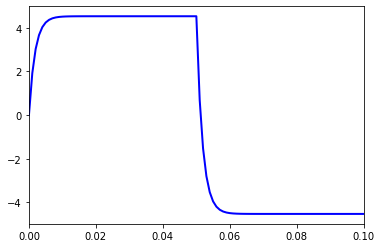

In [4]:
plt.plot(vt1, vy1, lw=2, c='Blue')
plt.xlim(0.,limit_t1)
plt.show()

### Runge-Kutta

In [5]:
# Initial Conditions
t_pulse = 0
i2 = 0

# Simulation Parameters
total_time2 = 2 #in seconds
steps2 = 1
t, h = 0., 0.001

# Plotting Parameters
steps_to_save2 = int(total_time2/(h*steps2))
vt2 = np.zeros(steps_to_save2+1)
vy2 = np.zeros(steps_to_save2+1)
limit_t2 = 0.1

idx=0
vt2[idx] = t
vy2[idx] = i2
idx += 1
while t<total_time2:
    for step in range(steps2):
        k1 = f(t, i2, 'RK4')
        k2 = f(t+0.5*h, i2+0.5*h*k1, 'RK4')
        k3 = f(t+0.5*h, i2+0.5*h*k2, 'RK4')
        k4 = f(t+h, i2+h*k3, 'RK4')
        i2 += h/6.*(k1+2.*k2+2.*k3+k4)
        t += h
        
    print("At", t, "=> Current is", i2)
    vt2[idx] = t
    vy2[idx] = i2
    idx += 1

At 0.001 => Current is 1.56439031808
At 0.002 => Current is 2.588331450464044
At 0.003 => Current is 3.258532122553796
At 0.004 => Current is 3.697198884405384
At 0.005 => Current is 3.9843196468381428
At 0.006 => Current is 4.1722489348288745
At 0.007 => Current is 4.2952543802918255
At 0.008 => Current is 4.37576519249841
At 0.009000000000000001 => Current is 4.428461972366715
At 0.010000000000000002 => Current is 4.462953620536442
At 0.011000000000000003 => Current is 4.4855294552731655
At 0.012000000000000004 => Current is 4.500306027026183
At 0.013000000000000005 => Current is 4.509977743501716
At 0.014000000000000005 => Current is 4.516308176645926
At 0.015000000000000006 => Current is 4.520451638036124
At 0.016000000000000007 => Current is 4.523163659773178
At 0.017000000000000008 => Current is 4.524938760639243
At 0.01800000000000001 => Current is 4.526100618245934
At 0.01900000000000001 => Current is 4.526861089452969
At 0.02000000000000001 => Current is 4.527358841030614
At 0

At 0.6120000000000004 => Current is 4.436782958076287
At 0.6130000000000004 => Current is 4.468399959235641
At 0.6140000000000004 => Current is 4.489094249909487
At 0.6150000000000004 => Current is 4.502639293740024
At 0.6160000000000004 => Current is 4.511504937663884
At 0.6170000000000004 => Current is 4.517307771760846
At 0.6180000000000004 => Current is 4.521105903497926
At 0.6190000000000004 => Current is 4.5235918964543265
At 0.6200000000000004 => Current is 4.525219054596037
At 0.6210000000000004 => Current is 4.526284079181612
At 0.6220000000000004 => Current is 4.526981170225686
At 0.6230000000000004 => Current is 4.527437437555389
At 0.6240000000000004 => Current is 4.527736078425796
At 0.6250000000000004 => Current is 4.527931547975489
At 0.6260000000000004 => Current is 4.528059488751999
At 0.6270000000000004 => Current is 4.528143229888762
At 0.6280000000000004 => Current is 4.528198041014486
At 0.6290000000000004 => Current is 4.528233916566445
At 0.6300000000000004 => Cu

At 1.2369999999999746 => Current is 4.528297244286657
At 1.2379999999999745 => Current is 4.528298848130945
At 1.2389999999999743 => Current is 4.528299897895904
At 1.2399999999999742 => Current is 4.528300584999057
At 1.2409999999999741 => Current is 4.528301034729008
At 1.241999999999974 => Current is 4.528301329090965
At 1.242999999999974 => Current is 4.528301521759835
At 1.2439999999999738 => Current is 4.528301647867481
At 1.2449999999999737 => Current is 4.528301730408779
At 1.2459999999999736 => Current is 4.528301784434573
At 1.2469999999999735 => Current is 4.528301819796102
At 1.2479999999999734 => Current is 4.5283018429413
At 1.2489999999999732 => Current is 4.528301858090537
At 1.2499999999999731 => Current is 4.528301868006174
At 1.250999999999973 => Current is 4.528301874496261
At 1.251999999999973 => Current is 4.52830187874422
At 1.2529999999999728 => Current is 4.52830188152464
At 1.2539999999999727 => Current is 1.3995212471845089
At 1.2549999999999726 => Current is

At 1.8609999999999058 => Current is -3.945825842979213
At 1.8619999999999057 => Current is -4.147053567242186
At 1.8629999999999056 => Current is -4.278763244467609
At 1.8639999999999055 => Current is -4.364971241593068
At 1.8649999999999054 => Current is -4.421397002592113
At 1.8659999999999053 => Current is -4.458329382539277
At 1.8669999999999052 => Current is -4.482502750596904
At 1.867999999999905 => Current is -4.4983249565875685
At 1.868999999999905 => Current is -4.508681072533606
At 1.8699999999999048 => Current is -4.515459465985887
At 1.8709999999999047 => Current is -4.519896131047706
At 1.8719999999999046 => Current is -4.522800063522169
At 1.8729999999999045 => Current is -4.524700775813662
At 1.8739999999999044 => Current is -4.525944849925855
At 1.8749999999999043 => Current is -4.5267591343409945
At 1.8759999999999042 => Current is -4.52729210830311
At 1.876999999999904 => Current is -4.52764095600179
At 1.877999999999904 => Current is -4.527869287450462
At 1.878999999

IndexError: index 2001 is out of bounds for axis 0 with size 2001

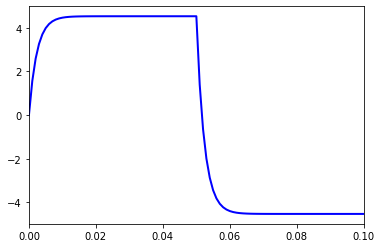

In [6]:
plt.plot(vt2, vy2, lw=2, c='Blue')
plt.xlim(0.,limit_t2)
plt.show()

## Decay Mode in High Torque

### Definitions

In [7]:
# Motor constants
R = 5.3 # In Ohms
L = 0.0125 # In Henrys
f = 1. # In Hertzs
T = 1/f # In seconds
v_high = 24 # In volts

def pulse2(t):
    global n_pulse
    
    #print("t = ", t)
    #print("n_pulse = ", n_pulse)
    #print("n_pulse*T/2 = ", n_pulse*T/2)
    #print("(n_pulse+1)*T/2 = ", (n_pulse+1)*T/2)
    #print("(n_pulse+2)*T/2 = ", (n_pulse+2)*T/2)
    #print("")
    
    if n_pulse*T/2 <= t and t < (n_pulse+1)*T/2:
        v = v_high
        #print("v = ", v)
        
    elif (n_pulse+1)*T/2 <= t and t < (n_pulse+2)*T/2:
        v = -v_high
        #print("v = ", v)
    
    elif (n_pulse+2)*T/2 <= t and t < (n_pulse+3)*T/2:
        v = v_high
        #print("v = ", v)
    
    else:
        sys.exit("Error")
        
    return v 

def f2(t, i, decay_mode):
    global t_decay
    
    #print("At t: ", t, "sec. The pulse: ", n_pulse, ". The voltage is: ", v)
    
    i_present = i
    
    if t_decay < t_off and decay_mode == 'sd':
        v = 0
        t_decay += h/4
    elif t_decay < t_off and decay_mode == 'fd':
        v = -pulse2(t)
        t_decay += h/4
    else:
        v = pulse2(t)
    
    i_next = (1/L)*(v - R*i_present)
    
    #print("At t: ", t, "sec. The pulse: ", n_pulse, ". The voltage is: ", v)
    
    return i_next

# Decay Mode constants
R_decay, C = 47000, 1e-9
t_off = R_decay * C
t_blank = 1400 * C
i_chop = 1.

### Fast Decay

In [ ]:
# Initial Conditions
n_pulse, next_pulse = 0, 0
i3 = 0

# Simulation Parameters
total_time3 = 2 #in seconds
steps3 = 1
t, h = 0., 1e-7
t_decay = 1.

# Plotting Parameters
steps_to_save3 = int(total_time3/(h*steps3))
vt3 = np.zeros(steps_to_save3+2)
vy3 = np.zeros(steps_to_save3+2)
limit_t3 = 0.1

# First step of the simulation
idx=0
vt3[idx] = t
vy3[idx] = i3
idx += 1

while t<total_time3:
    for step in range(steps3):
        
        decay_mode = 'fd'
        k1 = f2(t, i3, decay_mode)
        k2 = f2(t+0.5*h, i3+0.5*h*k1, decay_mode)
        k3 = f2(t+0.5*h, i3+0.5*h*k2, decay_mode)
        k4 = f2(t+h, i3+h*k3, decay_mode)
        
        i3 += h/6.*(k1+2.*k2+2.*k3+k4)
        
        t += h
        
        if t >= (next_pulse+1)*T:
            n_pulse += 2
            next_pulse = n_pulse/2
            #print("At ", t, "sec, the pulse:", next_pulse)
        
        if i3 > i_chop or i3 < -i_chop:
            t_decay = 0.
        
        elif t_decay < t_off:
            continue
            
        else:
            t_decay = t_off+1
        
    #print("At", t, "=> Current is", i3, "Time Decay: ", t_decay)
    vt3[idx] = t
    vy3[idx] = i3
    idx += 1

In [ ]:
%matplotlib notebook
limit_t3 = 2*T
start = 0
plt.plot(vt3, vy3, lw=2, c='Blue')
plt.xlim(0.+start,limit_t3+start)
plt.show()

### Slow Decay

In [ ]:
# Initial Conditions
n_pulse, next_pulse = 0, 0
i4 = 0

# Simulation Parameters
total_time4 = 2 #in seconds
steps4 = 1
t, h = 0., 1e-6
t_decay = 1.

# Plotting Parameters
steps_to_save4 = int(total_time4/(h*steps4))
vt4 = np.zeros(steps_to_save4+2)
vy4 = np.zeros(steps_to_save4+2)
limit_t4 = 0.1

# First step of the simulation
idx=0
vt4[idx] = t
vy4[idx] = i4
idx += 1

while t<total_time4:
    for step in range(steps4):
        
        decay_mode = 'sd'
        k1 = f2(t, i4, decay_mode)
        k2 = f2(t+0.5*h, i4+0.5*h*k1, decay_mode)
        k3 = f2(t+0.5*h, i4+0.5*h*k2, decay_mode)
        k4 = f2(t+h, i4+h*k3, decay_mode)
        
        i4 += h/6.*(k1+2.*k2+2.*k3+k4)
        
        t += h
        
        if t >= (next_pulse+1)*T:
            n_pulse += 2
            next_pulse = n_pulse/2
            #print("At ", t, "sec, the pulse:", next_pulse)
        
        if i4 > i_chop or i4 < -i_chop:
            t_decay = 0.
        
        elif t_decay < t_off:
            continue
            
        else:
            t_decay = t_off+1
        
    #print("At", t, "=> Current is", i3, "Time Decay: ", t_decay)
    vt4[idx] = t
    vy4[idx] = i4
    idx += 1

In [ ]:
%matplotlib notebook
limit_t4 = 2*T
start = 0
plt.plot(vt4, vy4, lw=2, c='Blue')
plt.xlim(0.+start,limit_t4+start)
plt.show()